# **PCA through Singular Value Decomposition**

In [36]:
import numpy as np

# Define 3 points in 2D-space:
X = np.array([[2, 1, 0],[4, 3, 0]])

# Calculate the covariance matrix:
R = np.cov(X)

# Calculate the SVD decomposition and new basis vectors:
[U, D, V] = np.linalg.svd(R)  # call SVD decomposition
u1 = U[:,0]  # new basis vectors
u2 = U[:,1]

# Calculate the coordinates in the new orthonormal basis:
X_new_basis = np.dot(U.T, X)

# Calculate the approximation of the original from the new basis
X_approximation = np.dot(U, X_new_basis)

# Check that you got the original
print("Original X:")
print(X)
print("\nPoints in new orthonormal basis:")
print(X_new_basis)
print("Approximation from new basis:")
print(X_approximation)


Original X:
[[2 1 0]
 [4 3 0]]

Points in new orthonormal basis:
[[-4.47066848 -3.14092366  0.        ]
 [-0.11455726  0.36687677  0.        ]]
Approximation from new basis:
[[2. 1. 0.]
 [4. 3. 0.]]


## **PCA on Iris data**

In [37]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

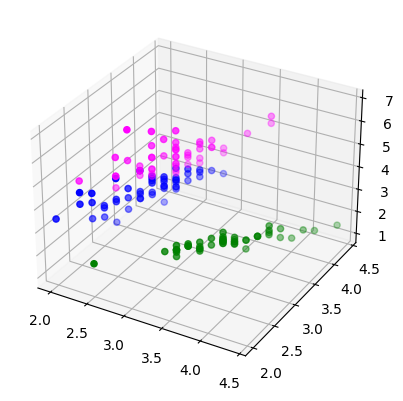

In [38]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

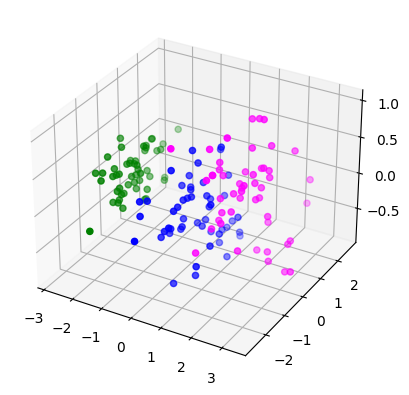

In [39]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [40]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [41]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

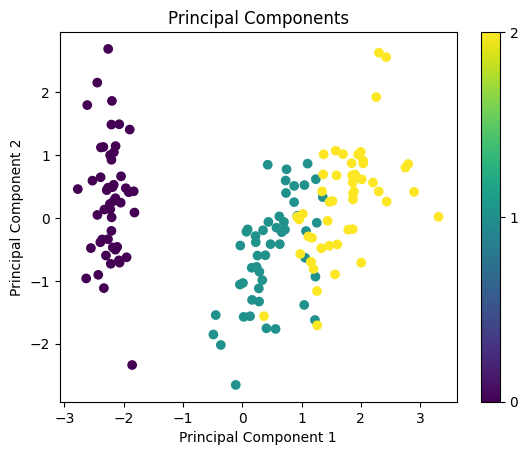

In [50]:
# Plot the principal components in 2D, marking different targets in color
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y, cmap=plt.cm.viridis)
plt.colorbar(ticks=np.unique(y))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components')
plt.show()


# **KNN classifier**

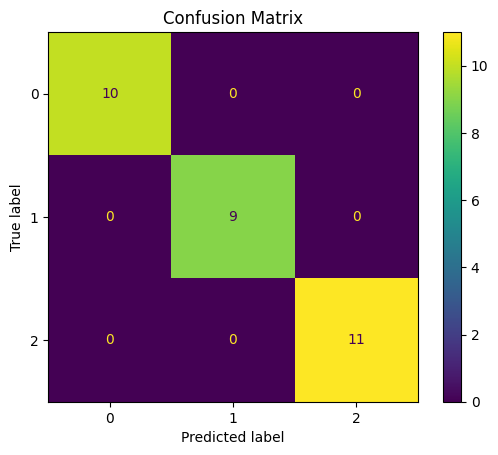

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Import train_test_split as in the last PC lab
from sklearn.model_selection import train_test_split

# Split X (original) into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier on full 4-dimensional X
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Predict on the test set
y_pred = knn1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


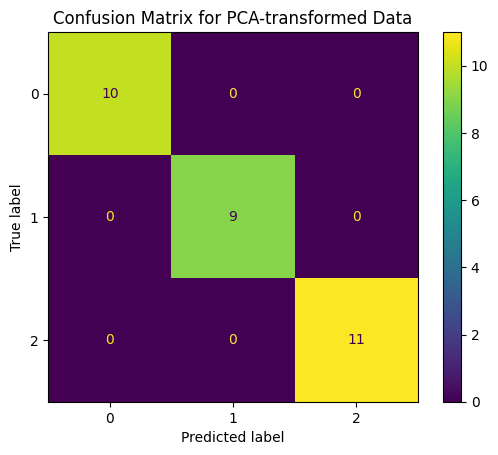

In [44]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Perform PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train KNN classifier on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Compute the confusion matrix for PCA-transformed data
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)

# Display the confusion matrix for PCA-transformed data
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=np.unique(y))
disp_pca.plot()
plt.title('Confusion Matrix for PCA-transformed Data')
plt.show()


## **Compare the results with full dataset**

Upon comparing the confusion matrices between the PCA-transformed data and the full dataset, it is evident that both matrices are identical. This suggests that the classification performance of the KNN classifier remains consistent regardless of whether the data is reduced to its principal components or not.
Therefore, we can conclude that the results obtained from both datasets are the same.

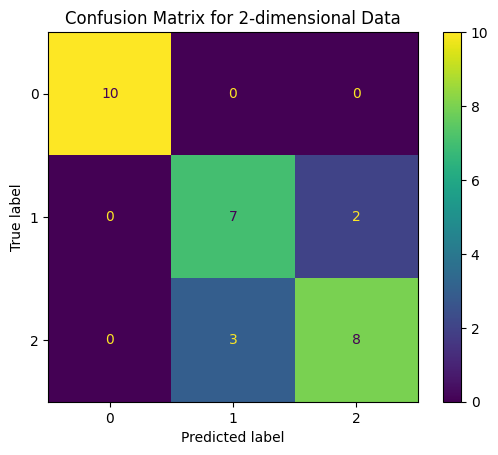

In [46]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Select only the first two columns of the original dataset
X_2d = X[:, :2]

# Split the 2D data into train and test sets
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train KNN classifier on 2-dimensional X
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train_2d)

# Predict on the test set
y_pred_2d = knn_2d.predict(X_test_2d)

# Compute the confusion matrix for 2-dimensional data
cm_2d = confusion_matrix(y_test_2d, y_pred_2d)

# Display the confusion matrix for 2-dimensional data
disp_2d = ConfusionMatrixDisplay(confusion_matrix=cm_2d, display_labels=np.unique(y))
disp_2d.plot()
plt.title('Confusion Matrix for 2-dimensional Data')
plt.show()


### **As Conclusion on the comparison between result of the full dataset and the only 2-dimensional data of original X**

**In summary, the analysis reveals:**

* The KNN model using the full dataset performs best.
* Reducing dimensions to 2 negatively impacts performance
* While the 2D model isn't perfect, it still outperforms a random classifier, indicating usable information remains.

**To improve the 2D model's performance, we can consider:**

* Employing a different dimensionality reduction technique.
* Utilizing a different classifier.
* Fine-tuning the model's hyperparameters.
* Gathering more data.

**Therefore, while dimensionality reduction can affect KNN performance, proper techniques can still enhance the 2D model.**